normal 0
anomaly 1


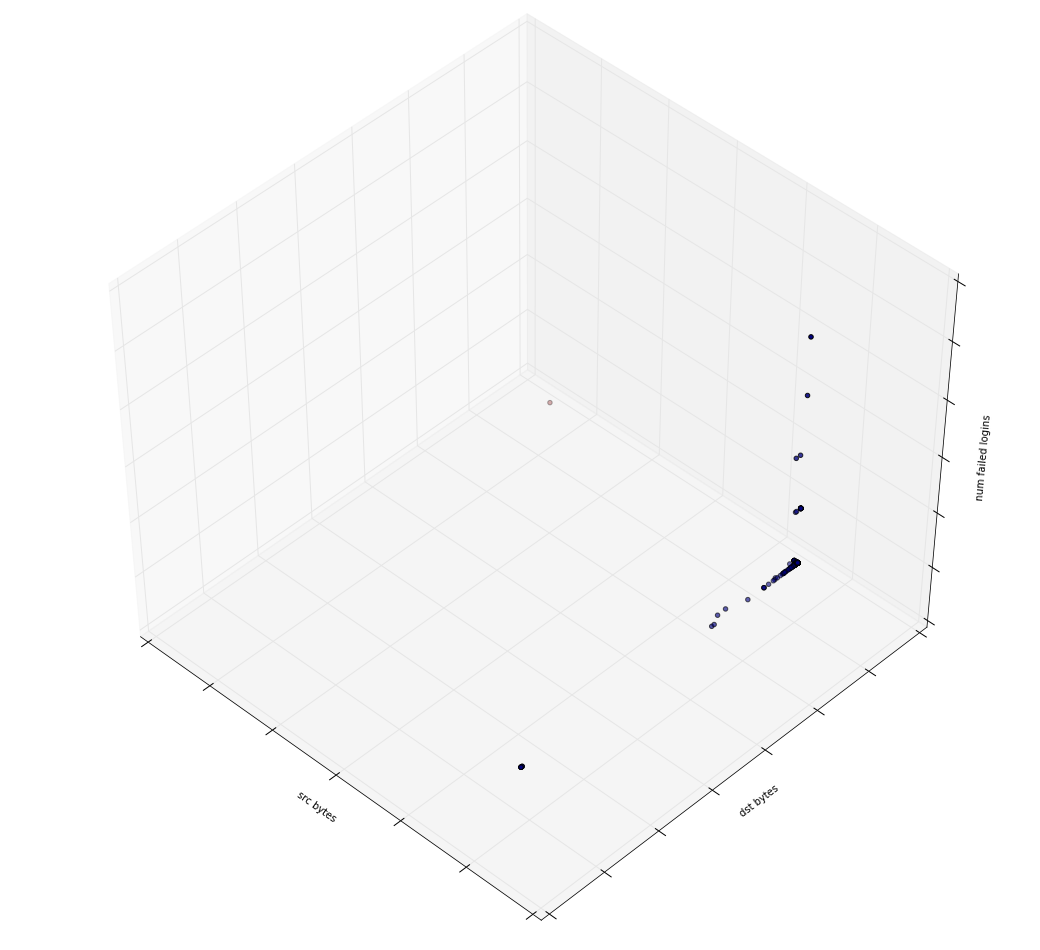

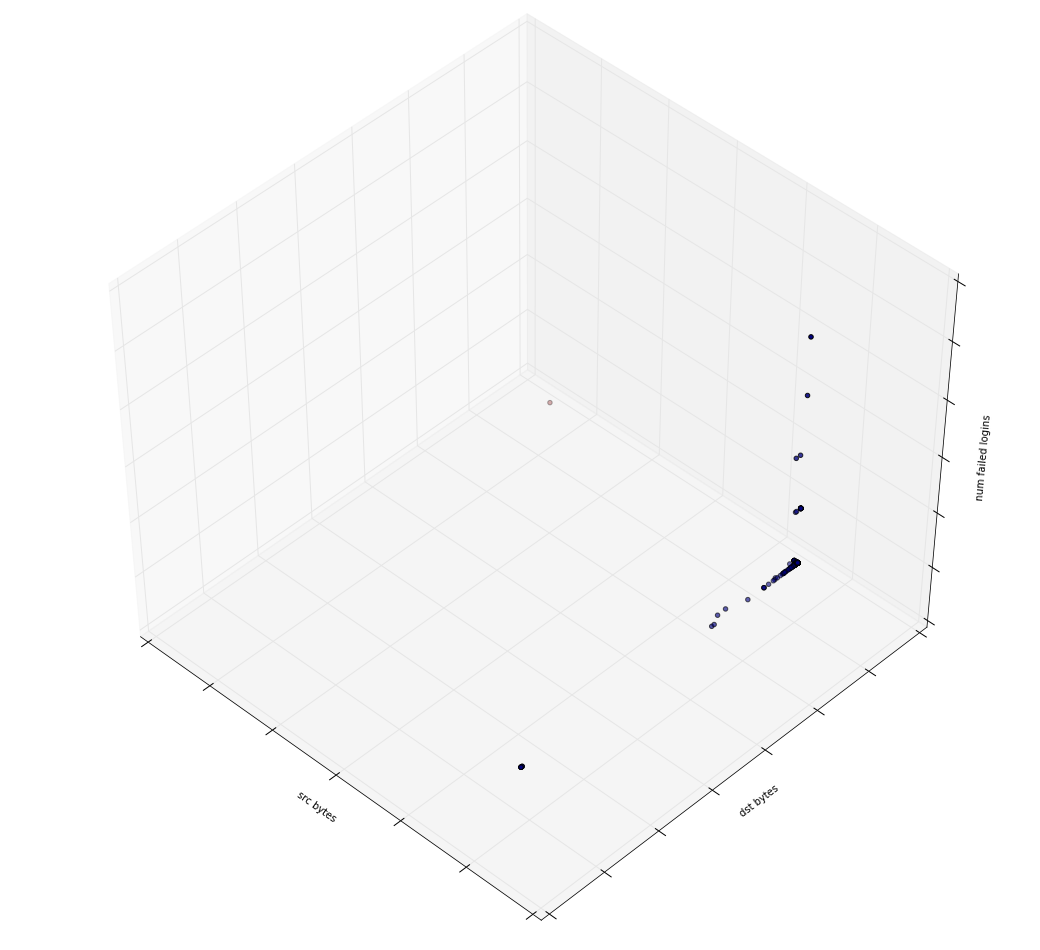

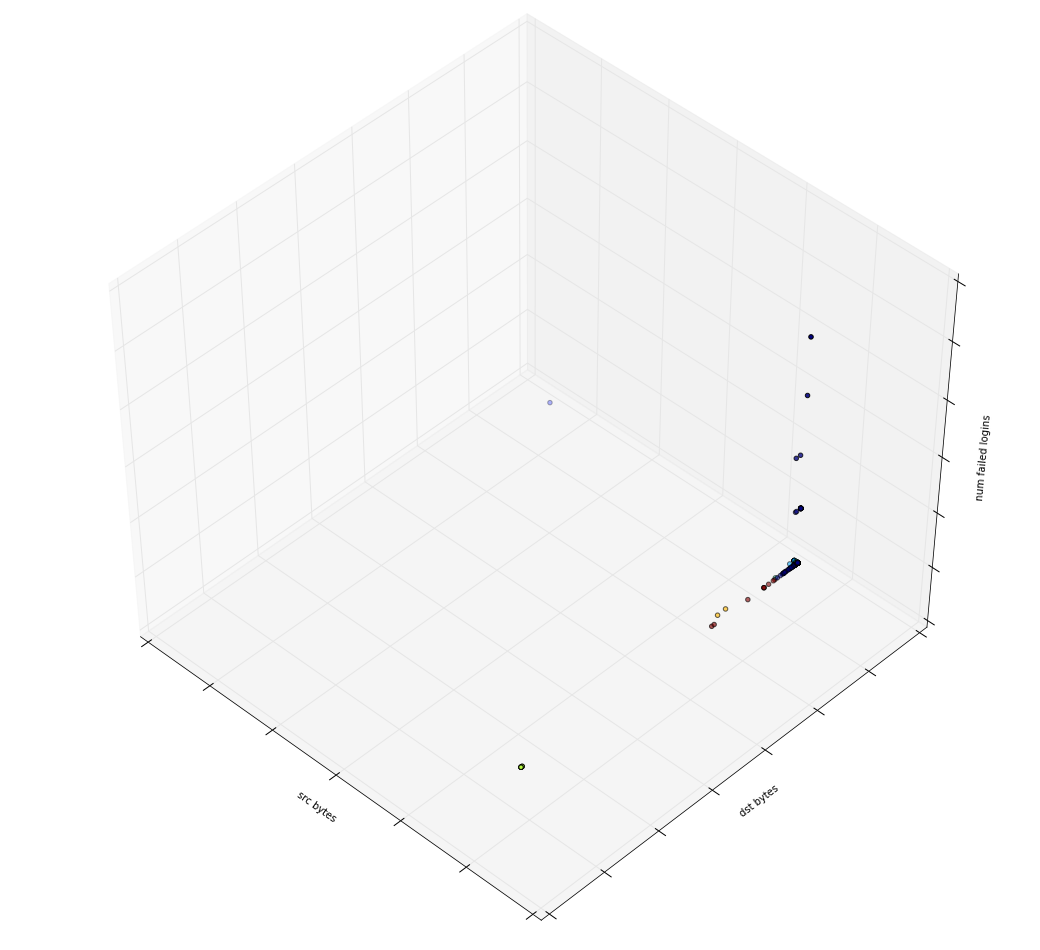

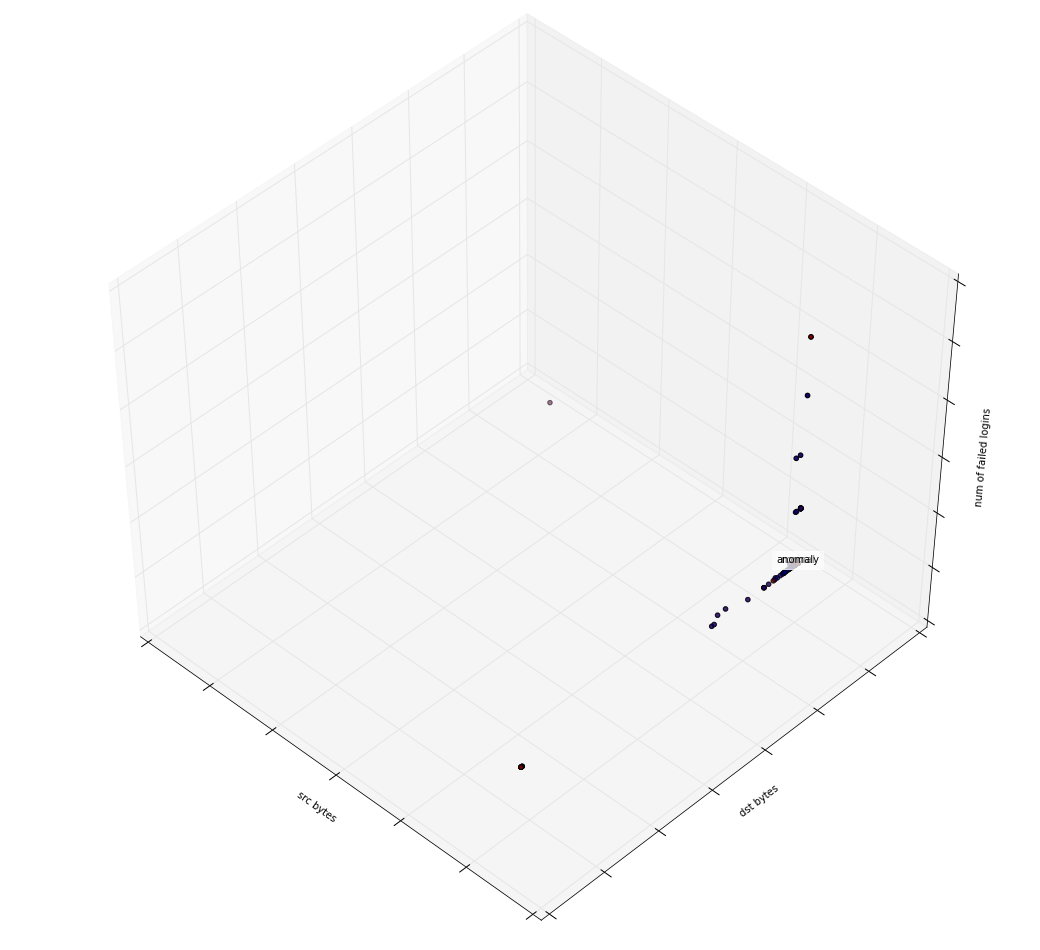

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import pandas as pd
from pandas import *

from sklearn.cluster import KMeans
from sklearn import datasets
import numpy.core.defchararray as np_f
from numpy import array

%matplotlib inline






np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

path = os.path.join(os.path.expanduser('~'),'Documents','Clustering','Kdd1999','NSL-KDD','kddTrain20.txt')
X = np.genfromtxt(path,delimiter=',',dtype=None, usecols=[4,5,10]) 
#print(type(X))
#print(X)




a = np.genfromtxt(path,delimiter=',',dtype=np.str, usecols=[41])  
b = np_f.replace(a, 'normal', '0')
c = np_f.replace(b, 'anomaly', '1')
d = ' '.join(str(v) for v in c)
e = [int(i) for i in d.split(' ')]
y = array(e)
#print(type(Y))
#print(Y)


estimators = {'k_means_kdd_3': KMeans(n_clusters=2),
              'k_means_kdd_8': KMeans(n_clusters=8),
              'k_means_kdd_bad_init': KMeans(n_clusters=2, n_init=1,
                                              init='random')}

fignum = 1
for name, est in estimators.items():
    #print(estimators.items())
    fig = plt.figure(fignum, figsize=(15, 13))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_
   

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float))
   
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('src bytes')
    ax.set_ylabel('dst bytes')
    ax.set_zlabel('num failed logins')
    fignum = fignum + 1
    
# Plot the ground truth
fig = plt.figure(fignum, figsize=(15, 13))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('normal', 0),
                    ('anomaly', 1) ]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    print(name,label)
    # Reorder the labels to have colors matching the cluster results
    y = np.choose(y, [1, 0]).astype(np.int)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

    
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('src bytes')
ax.set_ylabel('dst bytes')
ax.set_zlabel('num of failed logins')
plt.show()

    











